In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the dataset
data = pd.read_excel('1673873196_hr_comma_sep.xlsx')


In [3]:
# Display the dataset
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
Perform the following steps:
1.	Perform data quality checks by checking for missing values, if any
2.	Understand what factors contributed most to employee turnover by EDA
2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data
2.2.	Draw the distribution plot of
■	Employee Satisfaction (use column satisfaction_level)
■	Employee Evaluation (use column last_evaluation)
■	Employee Average Monthly Hours (use column average_montly_hours)
2.3.	Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization 
(use column number_project and hue column left), and give your inferences from the plot


In [6]:
# missing values
data.isnull().sum().any()

False

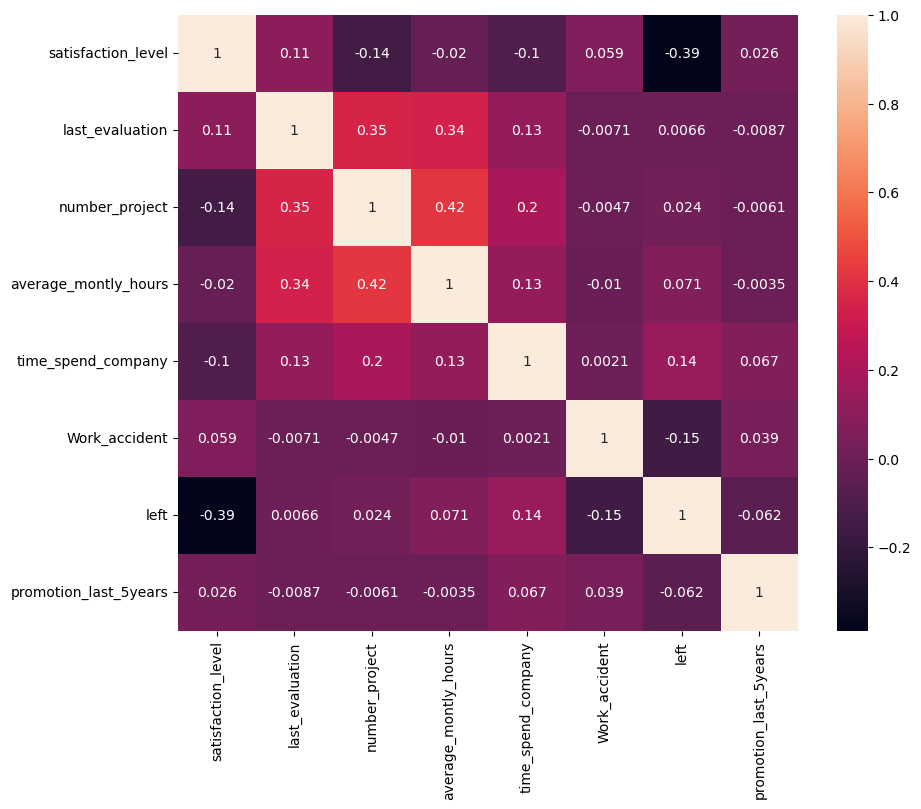

In [7]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

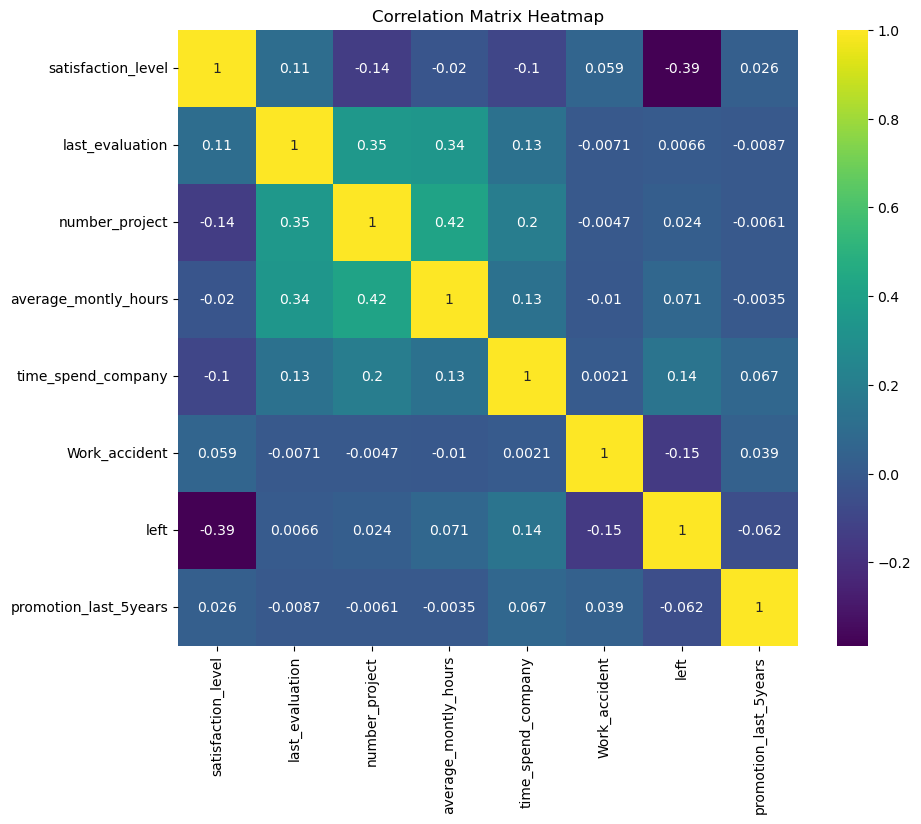

In [9]:
# Generate the correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Plot the heatmap with a specific color map
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

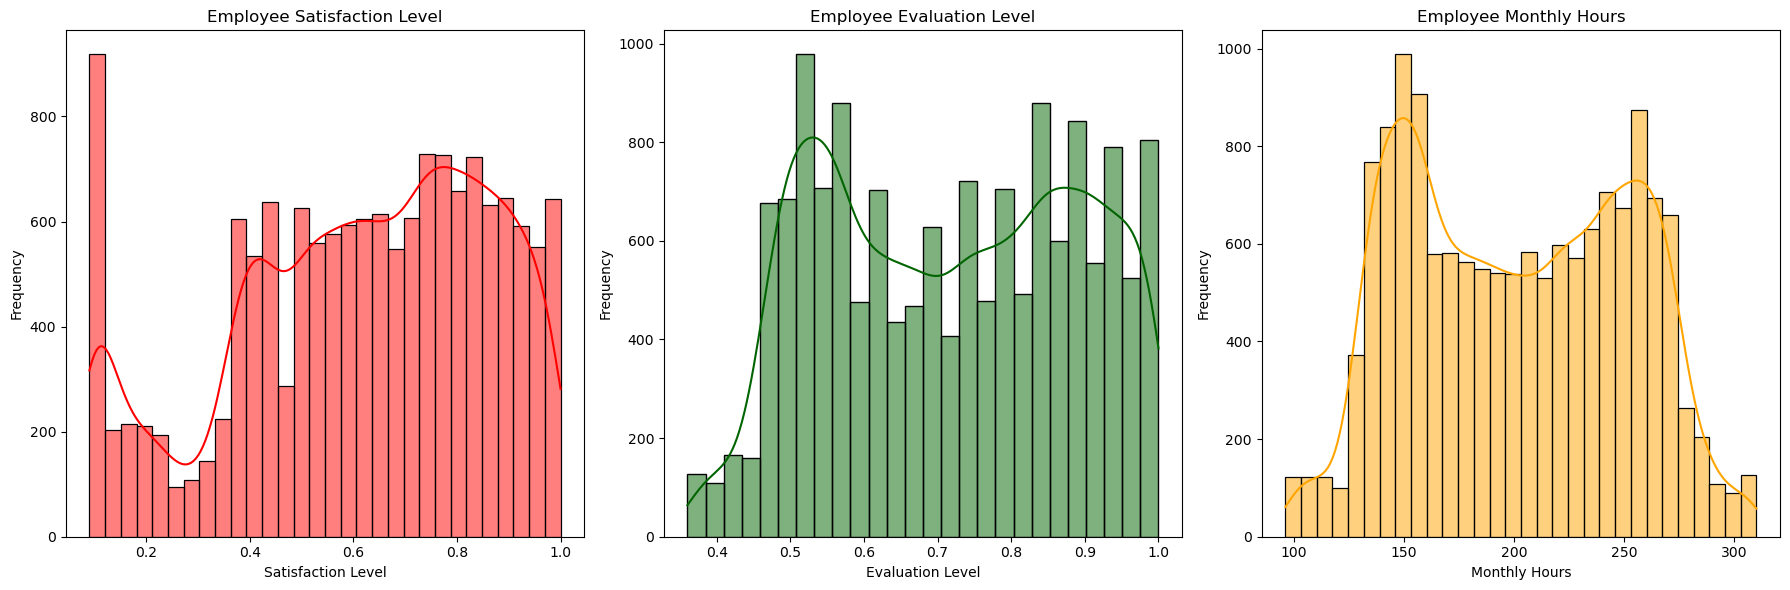

In [15]:
# Create a figure with subplots
plt.figure(figsize=(18,6))

# Satisfaction level histogram
plt.subplot(1,3,1)
sns.histplot(data['satisfaction_level'], kde=True, color='red')
plt.title('Employee Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')

# Last evaluation histogram
plt.subplot(1,3,2)
sns.histplot(data['last_evaluation'], kde=True, color='darkgreen')
plt.title('Employee Evaluation Level')
plt.xlabel('Evaluation Level')
plt.ylabel('Frequency')

# Average monthly hours histogram
plt.subplot(1,3,3)
sns.histplot(data['average_montly_hours'], kde=True, color='orange')
plt.title('Employee Monthly Hours')
plt.xlabel('Monthly Hours')
plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization 
(use column number_project and hue column left), and give your inferences from the plot


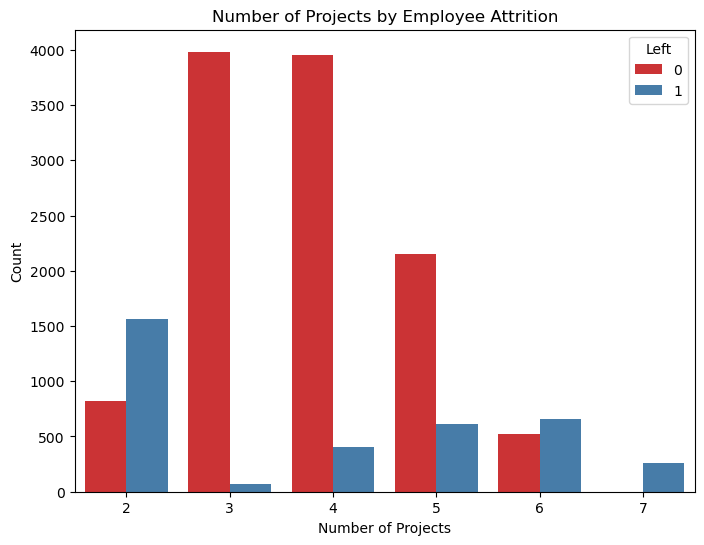

In [16]:
plt.figure(figsize=(8,6))
sns.countplot(x='number_project', hue='left', data=data, palette='Set1')
plt.title('Number of Projects by Employee Attrition')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right')
plt.show()

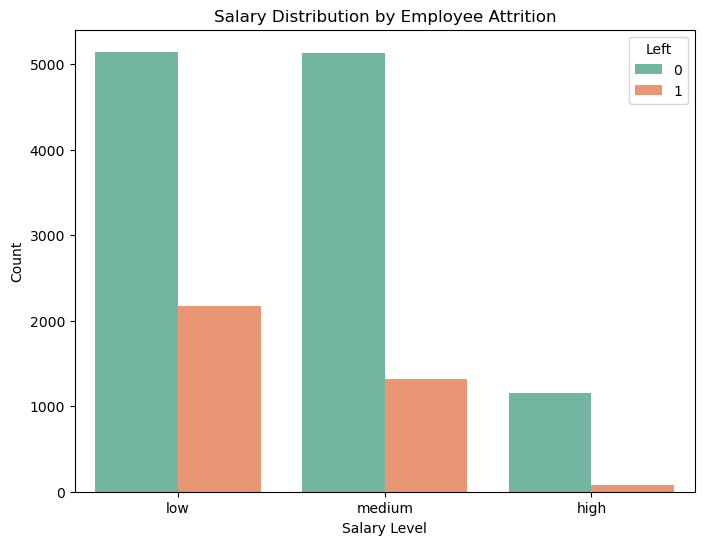

In [17]:
# Create the count plot with a custom color palette
plt.figure(figsize=(8,6))
sns.countplot(x='salary', hue='left', data=data, palette='Set2')
plt.title('Salary Distribution by Employee Attrition')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right')
plt.show()

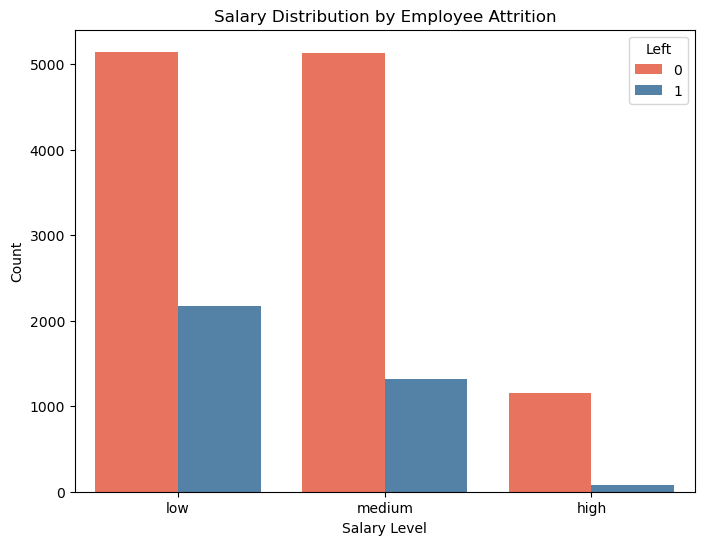

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(x='salary', hue='left', data=data, palette=['#FF6347', '#4682B4'])
plt.title('Salary Distribution by Employee Attrition')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right')
plt.show()


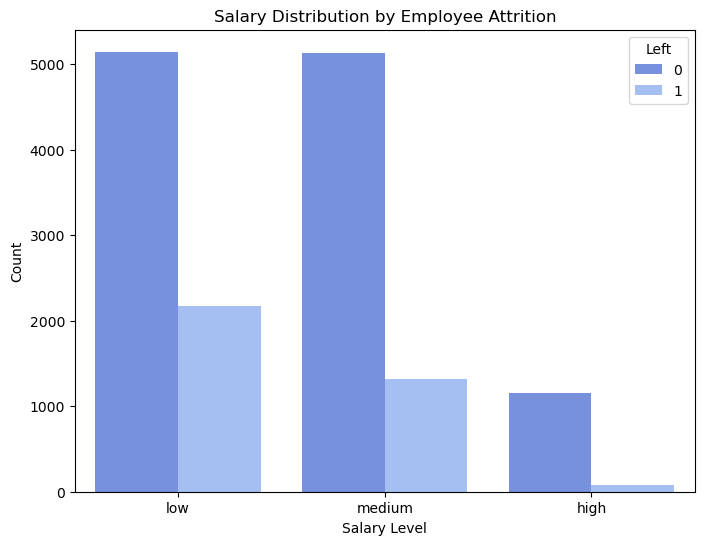

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='salary', hue='left', data=data, palette=sns.color_palette("coolwarm"))
plt.title('Salary Distribution by Employee Attrition')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right')
plt.show()

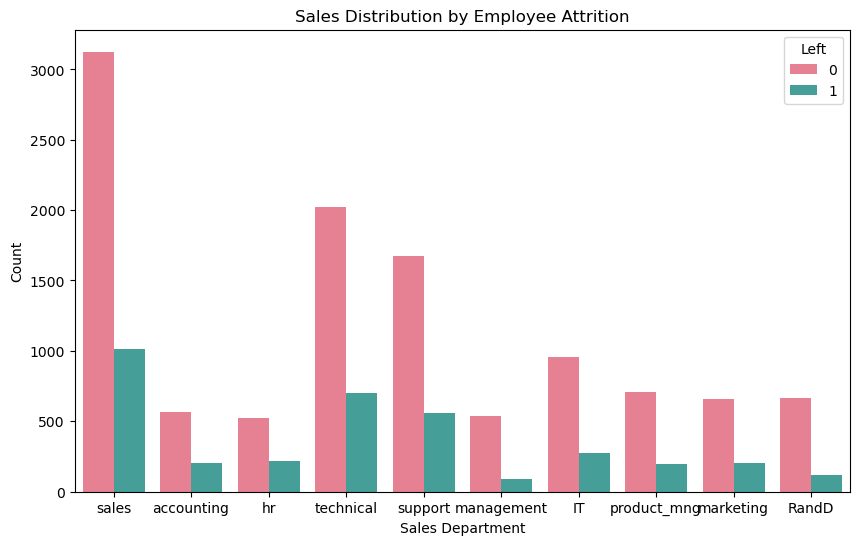

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='sales', hue='left', data=data, palette='husl')
plt.title('Sales Distribution by Employee Attrition')
plt.xlabel('Sales Department')
plt.ylabel('Count')
plt.legend(title='Left', loc='upper right')
plt.show()


In [ ]:
3.Perform clustering of employees who left based on their satisfaction and evaluation
3.1. Choose columns satisfaction_level, last_evaluation and left 
3.2. Do K-Means clustering of employees who left the company into 3 clusters? 
3.3. Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters

In [21]:
# Display the column names
print(data.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')


In [22]:
# select the relevant columns
cluster_data=data[['satisfaction_level', 'last_evaluation','left']]
left_emp_data=cluster_data[cluster_data['left']==1]

In [23]:
left_emp_data

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
14994,0.40,0.57,1
14995,0.37,0.48,1
14996,0.37,0.53,1
14997,0.11,0.96,1


In [ ]:
# drop left label
left_emp_data.drop('left',axis=1,inplace=True)

In [29]:
left_emp_data      

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.cluster import KMeans

In [32]:
# perform K means
kmeans=KMeans(n_clusters=3,random_state=42)
kmeans.fit(left_emp_data)

KMeans(n_clusters=3, random_state=42)

In [33]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 0])

In [56]:
# Assuming you have already performed K-means clustering and have cluster labels
# Replace 'kmeans.labels_' with your actual cluster labels

# Check the length of cluster labels
print("Length of cluster labels:", len(kmeans.labels_))

# Check the length of the DataFrame
print("Length of DataFrame:", len(left_emp_data))

# Add cluster labels to the DataFrame if the lengths match
if len(kmeans.labels_) == len(left_emp_data):
    left_emp_data['cluster'] = kmeans.labels_
    print("Cluster labels added successfully.")
else:
    print("Length of cluster labels does not match length of DataFrame.")

# Display the DataFrame
left_emp_data.head()


Length of cluster labels: 3571
Length of DataFrame: 14999
Length of cluster labels does not match length of DataFrame.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


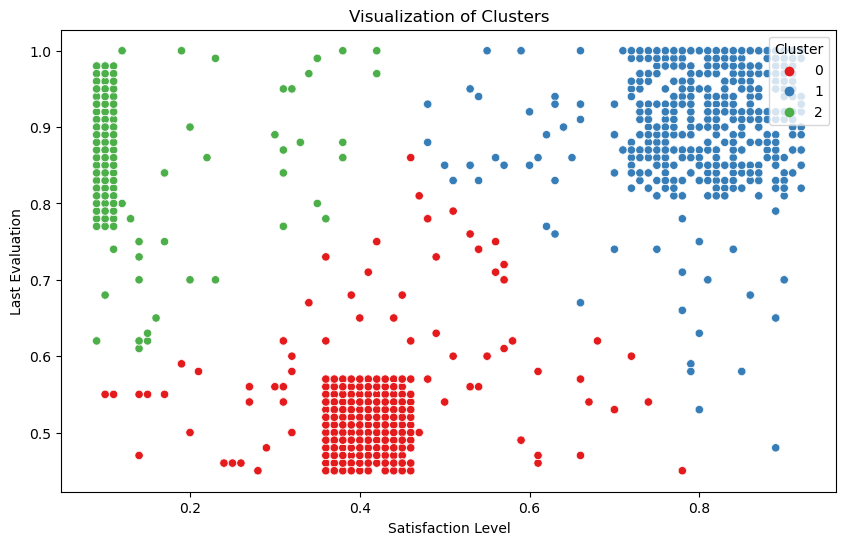

Centroids of each cluster:
[[0.41014545 0.51698182]
 [0.80851586 0.91170931]
 [0.11115466 0.86930085]]


In [61]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('1673873196_hr_comma_sep.xlsx')

# Filter employees who left the company
left_emp_data = data[data['left'] == 1]

# Select satisfaction_level and last_evaluation features
X = left_emp_data[['satisfaction_level', 'last_evaluation']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
left_emp_data['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', palette='Set1', data=left_emp_data)
plt.title('Visualization of Clusters')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster', loc='upper right')
plt.show()

# Print the centroids of each cluster
print("Centroids of each cluster:")
print(kmeans.cluster_centers_)


In [62]:
left_emp_data['cluster'].value_counts()

cluster
0    1650
1     977
2     944
Name: count, dtype: int64

In [ ]:
Handle the left Class Imbalance using the SMOTE technique 
4.1. Pre-process the data by converting categorical columns to numerical columns by ■ Separating categorical variables 
and numeric variables.
■ Applying get_dummies() to the categorical variables. 
■ Combining categorical variables and numeric variables. 
4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123 
4.3. Upsample the train dataset using the SMOTE technique from the imblearn module

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df_numerical=data.select_dtypes(include=['int64','float64'])
df_categorical=data.select_dtypes(include=['object'])

In [10]:
df_categorical

,sales,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


In [11]:
# apply dummy encoding
df_converted=pd.get_dummies(data=df_categorical).astype('int')

In [12]:
df_converted

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,0,1,0


In [13]:
# concat the data
df_new=pd.concat([df_numerical,df_converted],axis=1)


In [14]:
df_new.shape

(14999, 21)

In [15]:
df_new['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [17]:
import sklearn
print(sklearn.__version__)

1.5.0


In [ ]:
Perform 5-fold cross-validation model training and evaluate performance 
5.1. Train a Logistic Regression model, apply a 5-fold CV, and plot the classification report
5.2. Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report 
5.3. Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report


In [19]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn


In [23]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Apply Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=123)
log_reg.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred1 = log_reg.predict(X_test)

# Print the accuracy score
print('Accuracy score:', accuracy_score(y_test, y_pred1))

# Print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred1)
print('ROC AUC score:', roc_auc)

# Print classification report
print('Classification Report:\n', classification_report(y_test, y_pred1))


Accuracy score: 0.7823333333333333
ROC AUC score: 0.7603810553092628
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      2286
           1       0.53      0.72      0.61       714

    accuracy                           0.78      3000
   macro avg       0.72      0.76      0.73      3000
weighted avg       0.81      0.78      0.79      3000



C:\Users\priya\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
print(roc_auc_score(y_test,y_pred1))

0.7603810553092628


In [26]:
# Import necessary library
from sklearn import metrics

# Calculate predicted probabilities
y_pred_prob1 = log_reg.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob1)

# Print false positive rate, true positive rate, and thresholds
print("False Positive Rate (fpr):", fpr)
print("True Positive Rate (tpr):", tpr)
print("Thresholds:", thresholds)

# Calculate ROC AUC score
roc_auc = metrics.auc(fpr, tpr)
print("ROC AUC Score:", roc_auc)


False Positive Rate (fpr): [0.00000000e+00 8.74890639e-04 4.81189851e-03 5.68678915e-03
 6.12423447e-03 6.99912511e-03 1.04986877e-02 1.04986877e-02
 1.13735783e-02 1.18110236e-02 1.26859143e-02 1.31233596e-02
 1.39982502e-02 2.01224847e-02 2.01224847e-02 2.09973753e-02
 2.09973753e-02 2.36220472e-02 2.36220472e-02 2.58092738e-02
 2.58092738e-02 2.66841645e-02 2.66841645e-02 2.71216098e-02
 2.71216098e-02 2.75590551e-02 2.75590551e-02 2.84339458e-02
 2.88713911e-02 2.88713911e-02 2.88713911e-02 3.06211724e-02
 3.06211724e-02 3.06211724e-02 3.14960630e-02 3.14960630e-02
 3.19335083e-02 3.19335083e-02 3.28083990e-02 3.28083990e-02
 3.32458443e-02 3.32458443e-02 3.36832896e-02 3.36832896e-02
 3.41207349e-02 3.41207349e-02 3.41207349e-02 3.41207349e-02
 3.41207349e-02 3.41207349e-02 3.41207349e-02 3.41207349e-02
 3.45581802e-02 3.45581802e-02 3.49956255e-02 3.49956255e-02
 3.54330709e-02 3.54330709e-02 3.58705162e-02 3.58705162e-02
 3.67454068e-02 3.67454068e-02 3.71828521e-02 3.71828521e-

In [27]:
from sklearn import metrics

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred1)

# Print FPR, TPR, and Thresholds
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)
print("Thresholds:", thresholds)

# Calculate AUC
roc_auc = metrics.auc(fpr, tpr)

# Print AUC score
print("Area Under Curve (AUC):", roc_auc)


False Positive Rate (FPR): [0.         0.19772528 1.        ]
True Positive Rate (TPR): [0.         0.71848739 1.        ]
Thresholds: [inf  1.  0.]
Area Under Curve (AUC): 0.7603810553092628


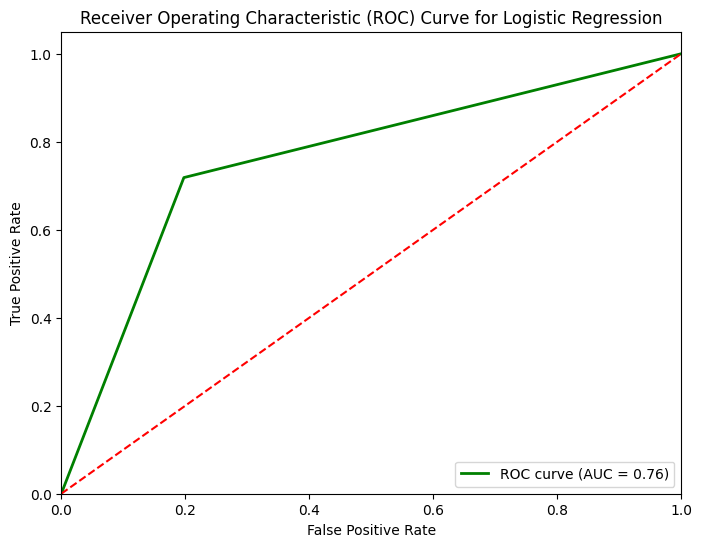

In [29]:
import matplotlib.pyplot as plt

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_resample and y_train_resample contain the resampled training data using SMOTE

# Create and train Random Forest Classifier
random_forest = RandomForestClassifier(max_depth=5)
random_forest.fit(X_train_smote, y_train_smote)

# Predict on test data
y_pred = random_forest.predict(X_test)

# Print accuracy score
print('Accuracy score:', accuracy_score(y_test, y_pred))


Accuracy score: 0.9536666666666667


In [37]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)

[0.         0.03237095 1.        ]
[0.         0.90896359 1.        ]
[inf  1.  0.]


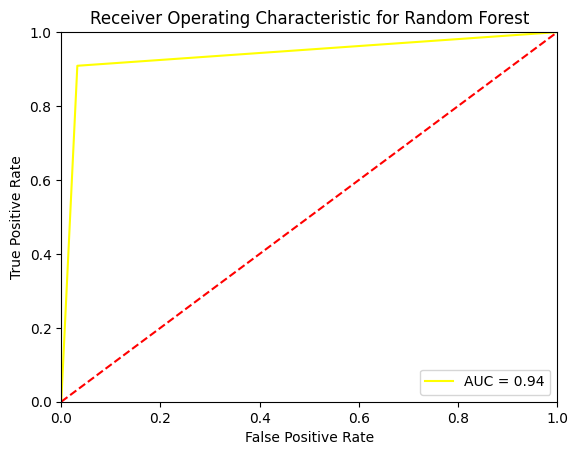

In [40]:
# method I: plt
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr, tpr, 'yellow', label = 'AUC = %0.2f' % roc_auc)  # Change 'b' to 'g' for green color
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [41]:
# apply Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost=GradientBoostingClassifier()

In [42]:
gradient_boost.fit(X_train_smote,y_train_smote)
y_pred2=gradient_boost.predict(X_test)

In [43]:
print('Accuracy score',accuracy_score(y_test,y_pred2))

Accuracy score 0.9636666666666667


In [44]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.93      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [45]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred2)
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr, tpr)

[0.         0.02537183 1.        ]
[0.         0.92857143 1.        ]
[inf  1.  0.]


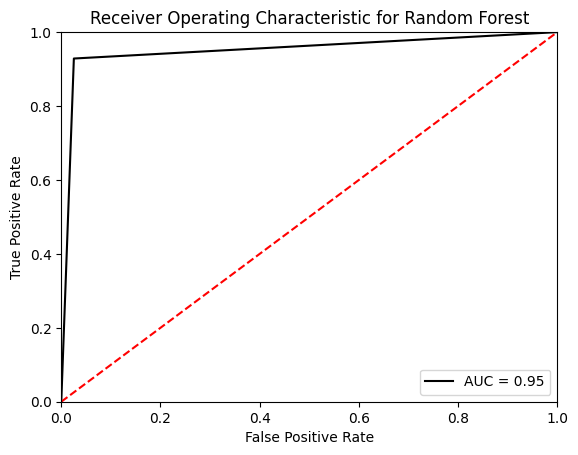

In [46]:
# method I: plt
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr, tpr, 'black', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.1/99.8 MB 351.4 kB/s eta 0:04:44
   ---------------------------------------- 0.1/99.8 MB 348.6 kB/s eta 0:04:46
   ---------------------------------------- 0.2/99.8 MB 687.0 kB/s eta 0:02:25
   ---------------------------------------- 0.2/99.8 MB 687.0 kB/s eta 0:02:25
   ---------------------------------------- 0.4/99.8 MB 880.6 kB/s eta 0:01:53
   ---------------------------------------- 0.6/99.8 MB 1.3 MB/s eta 0:01:19
   ---------------------------------------- 0.8/99.8 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.9/99.8 MB 1.7 MB/s eta 0:00:

In [48]:
# apply xgboost
import xgboost as xgb
model=xgb.XGBClassifier()
model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
y_pred3=model.predict(X_test)

In [50]:
print('Accuracy score',accuracy_score(y_test,y_pred3))

Accuracy score 0.983


In [ ]:
Suggest various retention strategies for targeted employees 
7.1. Using the best model, predict the probability of employee turnover in the test data 
7.2. Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on
the retention strategies for each zone ■ Safe Zone (Green) (Score < 20%) 
■ Low Risk Zone (Yellow) (20% < Score < 60%) 
■ Medium Risk Zone (Orange) (60% < Score < 90%) 
■ High Risk Zone (Red) (Score > 90%).

In [51]:
predicted_prob=model.predict_proba(X_test)

In [52]:
predicted_prob[:,1]

array([2.0239866e-04, 8.9765954e-01, 3.8354285e-02, ..., 1.6143646e-02,
       1.4798146e-03, 9.8090887e-01], dtype=float32)

In [53]:
zone=[]
prob=[]

for i in predicted_prob[:,1]:
  prob.append(i)
  if (i<=0.2):
    zone.append("Safe Zone")
  elif (i>0.2 and i<=0.6):
    zone.append("Low Risk Zone")
  elif (i>0.6 and i<=0.9):
    zone.append("Medium Risk Zone ")
  else:
    zone.append("High Risk Zone ")

In [54]:
categories = ["Safe Zone","Low Risk Zone","Medium Risk Zone ","High Risk Zone "]
color = ["blue","green","yellow","Red"]

In [56]:
colordict = dict(zip(categories, color))
clr = pd.DataFrame({"zone":zone,"probability":prob})
clr["Color"] = clr["zone"].apply(lambda x: colordict[x])

In [57]:
clr['zone'] = clr['zone'].astype(str)

In [59]:
color= clr["Color"].tolist()
c = ["blue","Red","Orange","Yellow"]

C:\Users\priya\.jupyter\New folder\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

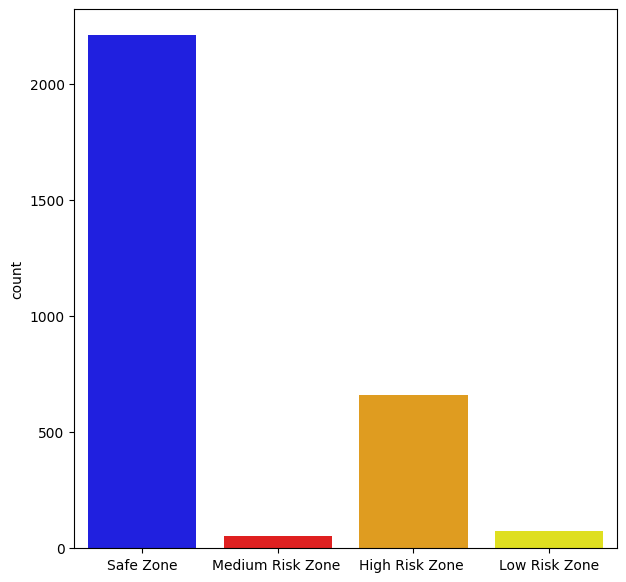

In [60]:
plt.figure(figsize=(7,7))
sns.countplot(x=zone,palette=c)

In [61]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
